In [1]:
#A_ch02_007_DecisionTrees.ipynb
#控制決策樹的複雜度,以scikit-learn 內附威斯康辛乳癌資料集, 為範例

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
#從scikit-learn 載入資料
from sklearn.datasets import load_breast_cancer
cancerData=load_breast_cancer() #載入 breast cancer 資料,並以cancerData 指定

In [4]:
#檢視資料, Dictionary-like object
cancerData?

In [5]:
print("cancerData.keys(): \n{}".format(cancerData.keys()))

cancerData.keys(): 
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'target_names'])


In [6]:
#資料列與特徵數, cancerData.data
print("cancerData.data 資料列與特徵數:{}".format(cancerData.data.shape))

cancerData.data 資料列與特徵數:(569, 30)


In [7]:
#目標值,cancerData.target, np.bincount() bins count ,Count number of occurrences of each value in array of non-negative ints
import numpy as np
print("cancerData.target , target_names:\n{}".format(
    {n: v for n,v in zip(cancerData.target_names, np.bincount(cancerData.target))}))

cancerData.target , target_names:
{'malignant': 212, 'benign': 357}


In [8]:
#準備訓練(train)與測試(test)資料集
#import train_test_split() function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancerData.data,cancerData.target,
                                               stratify=cancerData.target,random_state=42)

In [9]:
#匯入 DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
#建立一個 DecisionTreeClassifier object 'tree01', random_state 亂數種子
tree01=DecisionTreeClassifier(random_state=0)

In [11]:
#訓練模型, 未作任何限制, 建了一棵完全發展數,所有樹葉都是純的(pure)
treeModel01=tree01.fit(X_train,y_train)

In [12]:
treeModel01

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
#使用訓練資料集,驗證這個完全樹,treeModel01
#auc=1.0, 100%完全命中
treeModel01.score(X_train,y_train)

1.0

In [14]:
#但，改用測試資料集, auc=0.937
treeModel01.score(X_test,y_test)

0.93706293706293708

In [15]:
#以上可知，若不限制決策樹深度(不修剪),樹會變得任意深而複雜，易於過度擬合(overfitting)

In [16]:
#下例,我們以 max_depth, 限制樹的深度 (預修剪)

In [17]:
treeModel02=DecisionTreeClassifier(max_depth=4,random_state=0)
treeModel02.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
#再分別以訓練資料集及測試資料集計算auc
#訓練集不再100%,但測試集auc提高
print('Auc on trainint set:{:.3f}'.format(treeModel02.score(X_train,y_train)))
print('Auc on test set:{:.3f}'.format(treeModel02.score(X_test,y_test)))

Auc on trainint set:0.988
Auc on test set:0.951


In [19]:
#分析決策樹,以scikit-learn export_graphviz() 將樹視覺化, 存到 "tree02.dot" 檔
from sklearn.tree import export_graphviz
export_graphviz(treeModel02,out_file="tree02.dot",class_names=["malignant","benign"],
               feature_names=cancerData.feature_names,impurity=False,filled=True)

In [20]:
#檢視 "tree02.dot" 檔
import graphviz

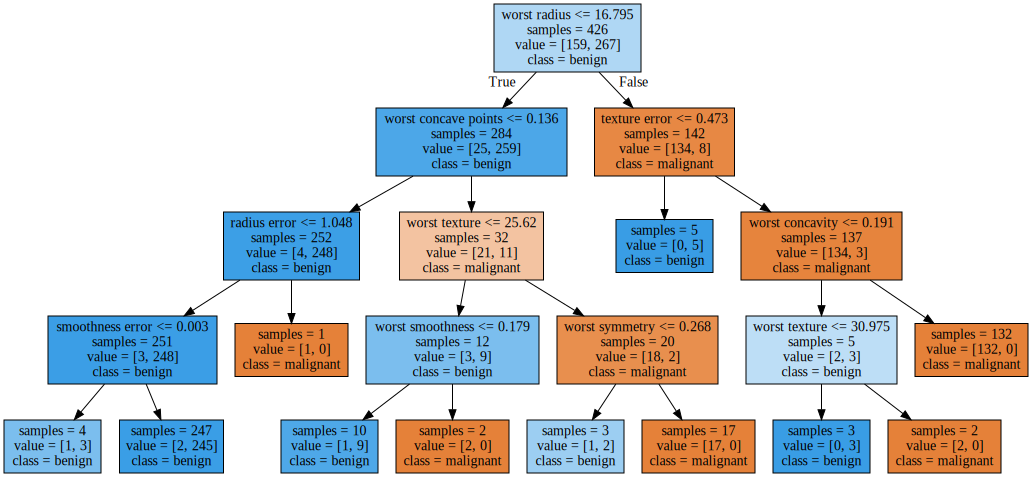

In [21]:
with open("tree02.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)